## A brief pandas tutorial

Here, we present examples of a couple of ways in which you can handle and manipulate
StatBank data returned as pandas dataframes by the denstatbank `.data()` method. 
This tutorial is by no means comprehensive, not even close,
but should hopefully help to get you started if you are new to pandas.

There are tons of online resources, many of which are free, that you can use to learn
how to work with pandas. An obviously great place to start is with the pandas [homepage](https://pandas.pydata.org).

But as with most things, the best way to learn is through practice. :-) 
So, let's get started!

In [1]:
import pandas as pd
from denstatbank import StatBankClient

In [2]:
sbc = StatBankClient()

Let us pick data from one of the many tables to experiment with. 
In this notebook, we use data from the 'Flytninger' table.

You can learn more about a given table with the denstatbank `.tableinfo()` method.

In [3]:
dag = ['D'+str(x).rjust(2, '0') for x in range(1, 32)]
maned = [str(x).rjust(3, '0') for x in range(1, 13)]
aar = [str(y) for y in range(2007, 2020)]

In [4]:
fdag = sbc.variable_dict(code='flyttedag', values=dag)
fmaned = sbc.variable_dict(code='flyttedmaned', values=maned)
tid = sbc.variable_dict(code='tid', values=aar)

In [5]:
ddf = sbc.data(table_id='flydag', variables=[fdag, fmaned, tid])

In [6]:
ddf.head()

Flytninger efter flyttedag, flyttemåned, Indhold og tid
flyttedag flyttedmaned tid                                                          
1.        Januar       2007                                            22051.0      
                       2008                                            21216.0      
                       2009                                            20142.0      
                       2010                                            20841.0      
                       2011                                            21042.0

The `.head()` method is a great way to get a quick look at the dataframe.

By default, `.head()` displays the first 5 rows, but you can always specify a different number as an argument.
For example, `.head(12)` displays up to the first 12 rows.

Similarly, the `.tail()` method displays the last 5 rows of the dataframe.

In [7]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4836 entries, ('1.', 'Januar', '2007') to ('31.', 'December', '2019')
Data columns (total 1 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Flytninger efter flyttedag, flyttemåned, Indhold og tid  4748 non-null   float64
dtypes: float64(1)
memory usage: 52.6+ KB


The `.info()` method provides a summary of the dataframe contents. As you can see, the dataframe
is multi-indexed with a single column containing the actual data which are floating point numbers.

The dataframe presumably contains one row for every day from 1st January 2007 to 31st December 2019 with both
dates included. 

Observe that there are 4836 entries but only 4748 of them are non-null. Therefore, we have 88 null or
NaN values. Let us find out what they are.

In [8]:
ddf[ddf.isna().any(axis=1)]

Flytninger efter flyttedag, flyttemåned, Indhold og tid
flyttedag flyttedmaned tid                                                          
29.       Februar      2007                                                NaN      
                       2009                                                NaN      
                       2010                                                NaN      
                       2011                                                NaN      
                       2013                                                NaN      
...                                                                        ...      
31.       November     2015                                                NaN      
                       2016                                                NaN      
                       2017                                                NaN      
                       2018                                                NaN      
                       2019                                                NaN      

[88 rows x 1 columns]

Okay! So the NaN values correspond to non-calendar days like 31st November. This is because the indices, albeit representing timestamps, are actually non-datetime string objects.

*This is an artifact of the denstatbank `.data()` method when constructing the dataframe.
We shall try to fix this will be fixed in an upcoming version.*

We'll come back to this later, but let us use this opportunity to demonstrate how you can get rid of these NaN values.

In [9]:
ddf.dropna(inplace=True)

By setting `inplace=True`, the operation is performed inplace on the original dataframe. 
Otherwise, the operation is performed on a copy of the original.
A number of pandas methods have the `inplace` keyword.

The dataframe has a rather long and unwieldy column name. Let us make it concise.
There are different ways of renaming the column name. One way is as shown below

In [10]:
ddf.columns = ['Flytninger']

In [11]:
ddf.head()

Flytninger
flyttedag flyttedmaned tid             
1.        Januar       2007     22051.0
                       2008     21216.0
                       2009     20142.0
                       2010     20841.0
                       2011     21042.0

Alternatively you could use pandas' rename function that you can use to rename index names or column names
like so 

`df.rename(columns={'old column name': 'new column name'}, inplace=True)`.

### Heirarchical Indexing

Since much of the data contained in tables are indexed to a few different variables,
it is fit to represent them as multi-indexed pandas dataframes. 

Dealing with multi-indexed dataframes requires some getting used to, and below I demonstrate
the basics. 

Pandas has excellent detailed documentation on how to handle multi-indexed dataframes which I link [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-indexing-with-hierarchical-index). 

Let us take a closer look at the structure of the dataframe index to begin with.

In [12]:
ddf.index

MultiIndex([( '1.',   'Januar', '2007'),
            ( '1.',   'Januar', '2008'),
            ( '1.',   'Januar', '2009'),
            ( '1.',   'Januar', '2010'),
            ( '1.',   'Januar', '2011'),
            ( '1.',   'Januar', '2012'),
            ( '1.',   'Januar', '2013'),
            ( '1.',   'Januar', '2014'),
            ( '1.',   'Januar', '2015'),
            ( '1.',   'Januar', '2016'),
            ...
            ('31.', 'December', '2010'),
            ('31.', 'December', '2011'),
            ('31.', 'December', '2012'),
            ('31.', 'December', '2013'),
            ('31.', 'December', '2014'),
            ('31.', 'December', '2015'),
            ('31.', 'December', '2016'),
            ('31.', 'December', '2017'),
            ('31.', 'December', '2018'),
            ('31.', 'December', '2019')],
           names=['flyttedag', 'flyttedmaned', 'tid'], length=4748)

In [13]:
ddf.index.levshape

(31, 12, 13)

As you can see, the multi-index is represented as an array of tuples.

Each tuple has three elements belonging to three levels: flyttedag, flyttedmaned, and tid
with 31, 12, 13 unique values respectively.

Dataframe indexing is done by using this tuple structure. However, heirarchical indexing works best
when the indices are sorted. 

In [14]:
# get data for a specific day, month and year

ddf.loc[('31.', 'December', '2016')]

Flytninger    1988.0
Name: (31., December, 2016), dtype: float64

Alternatively, you could use the `slice` method as so:

In [15]:
# get data for a specific day and month for all years

ddf.loc[('1.', 'Maj')]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until


,Flytninger
tid,
2007,27680.0
2008,26646.0
2009,26234.0
2010,25721.0
2011,24961.0
2012,26903.0
2013,26286.0
2014,25891.0
2015,26991.0


One can also use the `slice` method for indexing as follows

In [16]:
# get data for all days in December 2015

ddf.loc[(slice(None), 'December', '2015'),:]

,,,Flytninger
flyttedag,flyttedmaned,tid,
1.,December,2015,26258.0
2.,December,2015,994.0
3.,December,2015,887.0
4.,December,2015,1268.0
5.,December,2015,938.0
6.,December,2015,542.0
7.,December,2015,1753.0
8.,December,2015,795.0
9.,December,2015,796.0


In [17]:
# get data for the 1st of all months in 2018

ddf.loc[('1.', slice(None), '2018'),:]

Flytninger
flyttedag flyttedmaned tid             
1.        Januar       2018     21634.0
          Februar      2018     31036.0
          Marts        2018     29254.0
          April        2018     24589.0
          Maj          2018     27271.0
          Juni         2018     28524.0
          Juli         2018     31050.0
          August       2018     36541.0
          September    2018     32502.0
          Oktober      2018     31149.0
          November     2018     29638.0
          December     2018     26756.0

In [18]:
# get data for the whole year of 2015

ddf.loc[(slice(None), slice(None), '2015'),:]

Flytninger
flyttedag flyttedmaned tid             
1.        Januar       2015     20672.0
          Februar      2015     26701.0
          Marts        2015     24120.0
          April        2015     27828.0
          Maj          2015     26991.0
...                                 ...
31.       Maj          2015      2430.0
          Juli         2015      5548.0
          August       2015      5271.0
          Oktober      2015      2905.0
          December     2015      2167.0

[365 rows x 1 columns]

Heirarchical indexing is useful but perhaps there is a more natural way to deal with 
indices that are timestamps.

Let's try to turn this dataframe into one with a datetime index.

In [19]:
# make a copy to preseve the original dataframe for possible future use
df = ddf.copy()

# reset indices so that the three levels now become three columns
df.reset_index(inplace=True)

In [20]:
df.head()

,flyttedag,flyttedmaned,tid,Flytninger
0,1.,Januar,2007,22051.0
1,1.,Januar,2008,21216.0
2,1.,Januar,2009,20142.0
3,1.,Januar,2010,20841.0
4,1.,Januar,2011,21042.0


We have a little bit of cleaning up to do. Specifically, we need to:
1. Strip away the decimal point in the flyttedag column.
2. Replace the month names with their integer equivalents. Note: we do not change the type of the object itself, only their representation. For example, 'Maj' becomes '5' and not the integer 5.
3. Concatenate them into a string with a standard date format such as YYYY-MM-DD. 

In [21]:
df['flyttedag'] = df['flyttedag'].str.strip('.')

In [22]:
mnums = [str(x) for x in range(1, 13)]
mnames = df['flyttedmaned'].unique().tolist()

months = {name: num for name, num in zip(mnames, mnums)}

In [23]:
df.replace(months, inplace=True)

With the ingredients in place, we now use pandas `.to_datetime()` method to create a date column of type `datetime`.

In [24]:
df['date'] = pd.to_datetime(df['tid']+'-'+df['flyttedmaned']+'-'+df['flyttedag'], yearfirst=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   flyttedag     4748 non-null   object        
 1   flyttedmaned  4748 non-null   object        
 2   tid           4748 non-null   object        
 3   Flytninger    4748 non-null   float64       
 4   date          4748 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 185.6+ KB


We shall set the date column hereafter as the dataframe index and drop the redundant columns.

In [26]:
df.set_index('date', drop=True, inplace=True)

df.drop(columns=['flyttedag', 'flyttedmaned', 'tid'], inplace=True)

In [27]:
df.head()

,Flytninger
date,
2007-01-01,22051.0
2008-01-01,21216.0
2009-01-01,20142.0
2010-01-01,20841.0
2011-01-01,21042.0


This is not quite in chronological order. So, let us sort it.

In [28]:
df.sort_index(inplace=True)

In [29]:
df.head()

,Flytninger
date,
2007-01-01,22051.0
2007-01-02,1983.0
2007-01-03,1121.0
2007-01-04,1049.0
2007-01-05,1557.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4748 entries, 2007-01-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Flytninger  4748 non-null   float64
dtypes: float64(1)
memory usage: 74.2 KB


We now have a more intuitive representation of the data in our hands. 
Indexing can be made much more natural as we see with a few examples below

In [31]:
# all of 2018 data

df['2018']

,Flytninger
date,
2018-01-01,21634.0
2018-01-02,2971.0
2018-01-03,1487.0
2018-01-04,1012.0
2018-01-05,1668.0
...,...
2018-12-27,1142.0
2018-12-28,1674.0
2018-12-29,722.0


In [32]:
# only data from the first two months of '2013'

df['2013-01-01': '2013-02-28']

,Flytninger
date,
2013-01-01,20473.0
2013-01-02,2150.0
2013-01-03,1342.0
2013-01-04,1407.0
2013-01-05,1155.0
2013-01-06,599.0
2013-01-07,2216.0
2013-01-08,983.0
2013-01-09,888.0


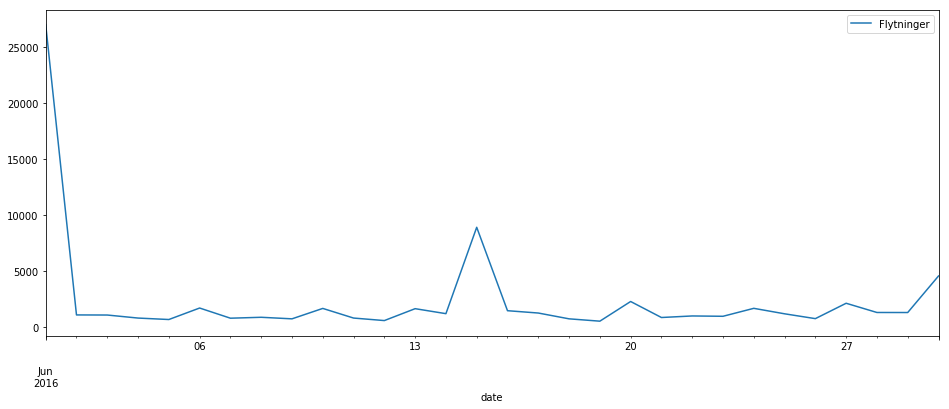

In [33]:
# plot the data from June 2016

df['2016-06'].plot(figsize=(16, 6))

Let's do a quick sanity check and make sure nothing was lost in the translation.

In [34]:
df.shape[0] == ddf.shape[0]

True

In [35]:
print(ddf.loc[('1.', 'April', '2017'), :] == df.loc['2017-04-01'])
print(ddf.loc[('21.', 'August', '2007'), :] == df.loc['2007-08-21'])
print(ddf.loc[('16.', 'November', '2014'), :] == df.loc['2014-11-16'])

Flytninger    True
dtype: bool
Flytninger    True
dtype: bool
Flytninger    True
dtype: bool


That's it for this notebook. Remember to explore pandas documentation or other sources on the web to
see what more you can do with dataframes. They are a really amazing tool!